In [1]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/ABS.csv',names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])

In [ ]:
data.drop(["change_perc", "volume_match", "avg",
                            "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)

In [4]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data.values[:, 2:3])

In [30]:
print(scaled.shape)

(378, 1)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [6]:
X_train=scaled[0:300] #Train 300, test 78
y_train=scaled[1:301]
X_train=np.reshape(X_train, (300 , 1 , 1))

In [23]:
regressor = Sequential()

regressor.add(LSTM(units=1, activation= 'sigmoid', input_shape=(30, 1)))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
history=regressor.fit(X_train, y_train, batch_size=4, epochs=150)

Epoch 1/150
75/75 [==============================] - 1s 1ms/step - loss: 0.1793
Epoch 2/150
75/75 [==============================] - 0s 2ms/step - loss: 0.1203
Epoch 3/150
75/75 [==============================] - 0s 1ms/step - loss: 0.0843
Epoch 4/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0636
Epoch 5/150
75/75 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 6/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 7/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 8/150
75/75 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 9/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 10/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 11/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 12/150
75/75 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 13/150
75/75 [=================

In [31]:
inputs = scaled[300:]
print(inputs.shape)
inputs = np.reshape(inputs, (78, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price=predicted_stock_price.reshape(78)

predicted_stock=[]
# #Lấy 7 ngày dự đoán 
# for i in range(10):
#   inputs = scaled[300:300+7*i+7]
#   inputs = np.reshape(inputs, (7*i+7, 1, 1))
#   # print(inputs)
#   predicted_stock_price = regressor.predict(inputs)
#   predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#   predicted_stock_price = predicted_stock_price.reshape(7*i+7)
#   predicted_stock.append( predicted_stock_price[-7:])

# #Lấy 7 ngày dự đoán 
# for i in range(10):
#   inputs = scaled[300:300+7*i+7]
#   inputs = np.reshape(inputs, (7*i+7, 1, 1))
#   # print(inputs)
#   predicted_stock_price = regressor.predict(inputs)
#   predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#   predicted_stock_price = predicted_stock_price.reshape(7*i+7)
#   predicted_stock.append( predicted_stock_price[-7:])

# predicted_stock=np.array(predicted_stock)
# # predicted_stock.reshape(7)
# predicted_stock=predicted_stock.flatten().tolist()



(78, 1)


In [25]:
real_stock_price=data.values[300:, 2:3].reshape(78)

print(predicted_stock_price)
print(real_stock_price)

[45.534313 45.534313 46.557434 47.36696  47.768574 45.328266 42.9277
 39.833035 36.90474  35.922436 33.844055 36.35928  36.90474  34.61017
 33.62515  33.953506 33.242104 32.530987 31.984365 31.11086  31.11086
 31.656616 30.783741 30.130411 28.611824 26.675365 24.709826 22.931078
 21.285158 22.77555  24.393877 26.19471  25.079473 23.50338  22.155916
 20.574585 21.642672 20.3223   19.920315 19.420795 18.48109  18.825838
 19.321297 19.870213 20.3223   19.920315 21.336145 22.827368 22.568563
 22.620272 22.258913 21.438198 21.74509  21.591509 21.591509 22.155916
 21.950262 21.693867 21.132378 19.920315 18.924652 19.470598 19.870213
 20.625135 20.827663 20.171318 19.720102 19.97045  19.670141 19.520428
 19.321297 19.122694 19.122694 19.720102 19.920315 20.171318 19.720102
 20.020618]
[44.0 44.0 45.0 45.8 46.2 43.8 41.5 38.6 35.9 35.0 33.1 35.4 35.9 33.8
 32.9 33.2 32.55 31.9 31.4 30.6 30.6 31.1 30.3 29.7 28.3 26.5 24.65 22.95
 21.35 22.8 24.35 26.05 25.0 23.5 22.2 20.65 21.7 20.4 20.0 19.5 1

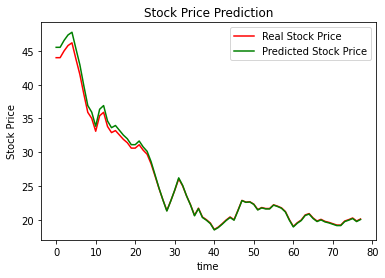

In [28]:
plt.plot( real_stock_price[:] , color = 'red' , label = 'Real Stock Price')
plt.plot( predicted_stock_price[:], color = 'green' , label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('time' )
plt.ylabel('Stock Price' )
plt.legend()
plt.show()

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fce8c264b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


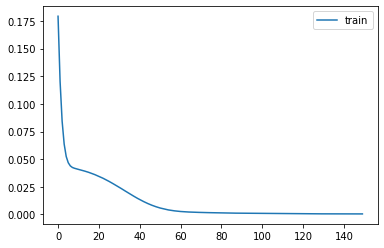

In [27]:
plt.plot(history.history['loss'], label='train')

plt.legend()
plt.show()